<a href="https://www.kaggle.com/code/sailikhitarage/20bd1a6642-riceimage?scriptVersionId=107078932" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

**Importing necessary libraries**

In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [3]:
os.listdir("../input/rice-image-dataset/Rice_Image_Dataset")

['Karacadag',
 'Basmati',
 'Jasmine',
 'Rice_Citation_Request.txt',
 'Arborio',
 'Ipsala']

In [4]:
from matplotlib import image
im = plt.imread("../input/rice-image-dataset/Rice_Image_Dataset/Ipsala/Ipsala (10000).jpg")

In [5]:
im.shape

(250, 250, 3)

In [6]:
im.size

187500

In [7]:
from PIL import Image 
im = Image.open("../input/rice-image-dataset/Rice_Image_Dataset/Arborio/Arborio (10004).jpg")

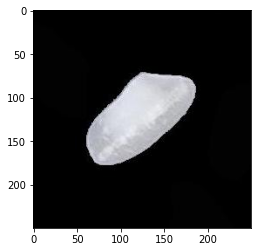

In [8]:
plt.imshow(im)

**Loading the dataset**

In [9]:
def Load_imgs(imagepath):
    imgs = []
    label = []
    l1 = os.listdir(imagepath)
    for i in l1:
        if i!="Rice_Citation_Request.txt":
            l2 = os.listdir(imagepath+'/'+i)
            for j in l2:
                c= 0
                img = Image.open(imagepath+i+'/'+j)
                img = img.resize(size=(32,32))
                img = img.convert('L')
                imgs.append(np.array(img).flatten())
                label.append(i)
                del img
    return np.array(imgs),label

In [10]:
x,y = Load_imgs("../input/rice-image-dataset/Rice_Image_Dataset/")
#../input/rice-image-dataset/Rice_Image_Dataset/

In [11]:
x.shape

(75000, 1024)

In [12]:
len(y)

75000

**Data Preprocessing**

In [13]:
target = pd.Series(y,dtype='category')
target

0        Karacadag
1        Karacadag
2        Karacadag
3        Karacadag
4        Karacadag
           ...    
74995       Ipsala
74996       Ipsala
74997       Ipsala
74998       Ipsala
74999       Ipsala
Length: 75000, dtype: category
Categories (5, object): ['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']

In [14]:
target.value_counts()

Arborio      15000
Basmati      15000
Ipsala       15000
Jasmine      15000
Karacadag    15000
dtype: int64

In [15]:
t = target.cat.codes

In [16]:
t

0        4
1        4
2        4
3        4
4        4
        ..
74995    2
74996    2
74997    2
74998    2
74999    2
Length: 75000, dtype: int8

**Splitting data into train and test**

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,t,test_size=0.25,random_state=1,shuffle=True)

In [18]:
len(x_train)

56250

In [19]:
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression()

In [20]:
LR_model.fit(x_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [21]:
LR_model.score(x_test,y_test)

0.9702933333333333

**ANN model**

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(64,input_dim=x_train.shape[1],activation='relu',name='sh_dense1'))
model.add(Dense(120,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(5,activation='softmax',name='sh_Dense2'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

2022-10-03 07:14:15.113543: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-03 07:14:15.251575: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-03 07:14:15.255925: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-03 07:14:15.260500: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

# **shapes of weight matrices for each layer**

# **Number of parameters after each layer**

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sh_dense1 (Dense)            (None, 64)                65600     
_________________________________________________________________
dense (Dense)                (None, 120)               7800      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               30976     
_________________________________________________________________
sh_Dense2 (Dense)            (None, 5)                 1285      
Total params: 105,661
Trainable params: 105,661
Non-trainable params: 0
_________________________________________________________________


Total number of parameters are 105,661

In [24]:
model.fit(x_train,y_train,epochs=10)

2022-10-03 07:14:19.599383: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
1758/1758 [==============================] - 7s 3ms/step - loss: 0.3989 - accuracy: 0.9180
Epoch 2/10
1758/1758 [==============================] - 5s 3ms/step - loss: 0.1423 - accuracy: 0.9544
Epoch 3/10
1758/1758 [==============================] - 5s 3ms/step - loss: 0.1142 - accuracy: 0.9620
Epoch 4/10
1758/1758 [==============================] - 5s 3ms/step - loss: 0.1036 - accuracy: 0.9654
Epoch 5/10
1758/1758 [==============================] - 6s 3ms/step - loss: 0.0978 - accuracy: 0.9669
Epoch 6/10
1758/1758 [==============================] - 6s 3ms/step - loss: 0.0917 - accuracy: 0.9688
Epoch 7/10
1758/1758 [==============================] - 5s 3ms/step - loss: 0.0897 - accuracy: 0.9700
Epoch 8/10
1758/1758 [==============================] - 5s 3ms/step - loss: 0.0872 - accuracy: 0.9712
Epoch 9/10
1758/1758 [==============================] - 5s 3ms/step - loss: 0.0833 - accuracy: 0.9717
Epoch 10/10
1758/1758 [==============================] - 5s 3ms/step - loss: 0.081

In [25]:
y_pred = model.predict(x_test)

In [26]:
_, accuracy = model.evaluate(x_train,y_train)
print('Accuracy: %.2f' % (accuracy*100))

1758/1758 [==============================] - 4s 2ms/step - loss: 0.0782 - accuracy: 0.9744
Accuracy: 97.44


In [27]:
_, accuracy = model.evaluate(x_test,y_test)
print('Accuracy: %.2f' % (accuracy*100))

586/586 [==============================] - 2s 3ms/step - loss: 0.0878 - accuracy: 0.9707
Accuracy: 97.07


**using Adadelta**

In [28]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adadelta',metrics=['accuracy'])

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sh_dense1 (Dense)            (None, 64)                65600     
_________________________________________________________________
dense (Dense)                (None, 120)               7800      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               30976     
_________________________________________________________________
sh_Dense2 (Dense)            (None, 5)                 1285      
Total params: 105,661
Trainable params: 105,661
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1758/1758 [==============================] - 6s 3ms/step - loss: 0.0753 - accuracy: 0.9751
Epoch 2/10
1758/1758 [==============================] - 5s 3ms/step - loss: 0.0717 - accuracy: 0.9762
Epoch 3/10
1758/1758 [==============================] - 5s 3ms/step - loss: 0.0696 - accuracy: 0.9769
Epoch 4/10
1758/1758 [==============================] - 6s 3ms/step - loss: 0.0682 - accuracy: 0.9771
Epoch 5/10
1758/1758 [==============================] - 5s 3ms/step - loss: 0.0672 - accuracy: 0.9773
Epoch 6/10
1758/1758 [==============================] - 5s 3ms/step - loss: 0.0665 - accuracy: 0.9775
Epoch 7/10
1758/1758 [==============================] - 5s 3ms/step - loss: 0.0659 - accuracy: 0.9777
Epoch 8/10
1758/1758 [==============================] - 5s 3ms/step - loss: 0.0655 - accuracy: 0.9778
Epoch 9/10
1758/1758 [==============================] - 5s 3ms/step - loss: 0.0652 - accuracy: 0.9779
Epoch 10/10
1758/1758 [==============================] - 6s 3ms/step - loss: 0.064

In [31]:
_, accuracy = model.evaluate(x_test,y_test)
print('Accuracy: %.2f' % (accuracy*100))

586/586 [==============================] - 2s 4ms/step - loss: 0.0752 - accuracy: 0.9751
Accuracy: 97.51


**Using Nadam**

In [36]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Nadam',metrics=['accuracy'])

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sh_dense1 (Dense)            (None, 64)                65600     
_________________________________________________________________
dense (Dense)                (None, 120)               7800      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               30976     
_________________________________________________________________
sh_Dense2 (Dense)            (None, 5)                 1285      
Total params: 105,661
Trainable params: 105,661
Non-trainable params: 0
_________________________________________________________________


In [38]:
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1758/1758 [==============================] - 9s 5ms/step - loss: 0.0827 - accuracy: 0.9732
Epoch 2/10
1758/1758 [==============================] - 8s 4ms/step - loss: 0.0773 - accuracy: 0.9743
Epoch 3/10
1758/1758 [==============================] - 7s 4ms/step - loss: 0.0783 - accuracy: 0.9746
Epoch 4/10
1758/1758 [==============================] - 8s 4ms/step - loss: 0.0819 - accuracy: 0.9729
Epoch 5/10
1758/1758 [==============================] - 7s 4ms/step - loss: 0.0735 - accuracy: 0.9756
Epoch 6/10
1758/1758 [==============================] - 8s 4ms/step - loss: 0.0731 - accuracy: 0.9760
Epoch 7/10
1758/1758 [==============================] - 7s 4ms/step - loss: 0.0713 - accuracy: 0.9763
Epoch 8/10
1758/1758 [==============================] - 8s 5ms/step - loss: 0.0735 - accuracy: 0.9752
Epoch 9/10
1758/1758 [==============================] - 7s 4ms/step - loss: 0.0703 - accuracy: 0.9760
Epoch 10/10
1758/1758 [==============================] - 7s 4ms/step - loss: 0.072

In [39]:
_, accuracy = model.evaluate(x_test,y_test)
print('Accuracy: %.2f' % (accuracy*100))

586/586 [==============================] - 2s 3ms/step - loss: 0.1016 - accuracy: 0.9707
Accuracy: 97.07


**Using Stochastic Gradient Descent(SGD)**

In [49]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='SGD',metrics=['accuracy'])

In [50]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sh_dense1 (Dense)            (None, 64)                65600     
_________________________________________________________________
dense (Dense)                (None, 120)               7800      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               30976     
_________________________________________________________________
sh_Dense2 (Dense)            (None, 5)                 1285      
Total params: 105,661
Trainable params: 105,661
Non-trainable params: 0
_________________________________________________________________


In [51]:
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1758/1758 [==============================] - 6s 3ms/step - loss: 1.6099 - accuracy: 0.1982
Epoch 2/10
1758/1758 [==============================] - 5s 3ms/step - loss: 1.6100 - accuracy: 0.1980
Epoch 3/10
1758/1758 [==============================] - 6s 3ms/step - loss: 1.6098 - accuracy: 0.2021
Epoch 4/10
1758/1758 [==============================] - 5s 3ms/step - loss: 1.6099 - accuracy: 0.2005
Epoch 5/10
1758/1758 [==============================] - 5s 3ms/step - loss: 1.6100 - accuracy: 0.1974
Epoch 6/10
1758/1758 [==============================] - 5s 3ms/step - loss: 1.6099 - accuracy: 0.1995
Epoch 7/10
1758/1758 [==============================] - 5s 3ms/step - loss: 1.6099 - accuracy: 0.2020
Epoch 8/10
1758/1758 [==============================] - 5s 3ms/step - loss: 1.6100 - accuracy: 0.2004
Epoch 9/10
1758/1758 [==============================] - 5s 3ms/step - loss: 1.6100 - accuracy: 0.1973
Epoch 10/10
1758/1758 [==============================] - 5s 3ms/step - loss: 1.610

In [52]:
_, accuracy = model.evaluate(x_test,y_test)
print('Accuracy: %.2f' % (accuracy*100))

586/586 [==============================] - 2s 2ms/step - loss: 1.6273 - accuracy: 0.1988
Accuracy: 19.88


**Using Root Mean Square(RMSprop)**

In [53]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='RMSprop',metrics=['accuracy'])

In [54]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sh_dense1 (Dense)            (None, 64)                65600     
_________________________________________________________________
dense (Dense)                (None, 120)               7800      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               30976     
_________________________________________________________________
sh_Dense2 (Dense)            (None, 5)                 1285      
Total params: 105,661
Trainable params: 105,661
Non-trainable params: 0
_________________________________________________________________


In [55]:
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1758/1758 [==============================] - 6s 3ms/step - loss: 1.6100 - accuracy: 0.2005
Epoch 2/10
1758/1758 [==============================] - 6s 4ms/step - loss: 1.6100 - accuracy: 0.2008
Epoch 3/10
1758/1758 [==============================] - 6s 3ms/step - loss: 1.6100 - accuracy: 0.1974
Epoch 4/10
1758/1758 [==============================] - 6s 3ms/step - loss: 1.6100 - accuracy: 0.2012
Epoch 5/10
1758/1758 [==============================] - 6s 3ms/step - loss: 1.6100 - accuracy: 0.1992
Epoch 6/10
1758/1758 [==============================] - 6s 3ms/step - loss: 1.6099 - accuracy: 0.2021
Epoch 7/10
1758/1758 [==============================] - 6s 3ms/step - loss: 1.6100 - accuracy: 0.1990
Epoch 8/10
1758/1758 [==============================] - 6s 3ms/step - loss: 1.6100 - accuracy: 0.1998
Epoch 9/10
1758/1758 [==============================] - 6s 3ms/step - loss: 1.6100 - accuracy: 0.1994
Epoch 10/10
1758/1758 [==============================] - 6s 3ms/step - loss: 1.610

In [56]:
_, accuracy = model.evaluate(x_test,y_test)
print('Accuracy: %.2f' % (accuracy*100))

586/586 [==============================] - 2s 3ms/step - loss: 1.6273 - accuracy: 0.1994
Accuracy: 19.94
